#  Car accident analysis in the US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [3]:
df = pd.read_csv('US_Accidents_Dec20.csv')

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.tail()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
4232536,A-4239402,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232537,A-4239403,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232538,A-4239404,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232539,A-4239405,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232540,A-4239406,Bing,NaN,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.13393,-117.23092,34.13736,-117.23934,0.537,At Highland Ave/Arden Ave - Accident.,NaN,CA-210 W,R,Highland,San Bernardino,CA,92346,US,US/Pacific,KSBD,2019-08-23 20:50:00,79.0,79.0,47.0,28.63,7.0,SW,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df_state = df.groupby('State').apply(lambda x: x.sort_values(['State'], ascending=True))

In [7]:
df_state.head()

ID    Source    TMC  Severity           Start_Time  \
State                                                                      
AL    443636    A-443649  MapQuest  201.0         2  2017-05-14 11:39:21   
      1915686  A-1915798  MapQuest  201.0         2  2018-09-27 18:08:33   
      1915687  A-1915799  MapQuest  201.0         2  2018-09-27 19:08:52   
      1915688  A-1915800  MapQuest  201.0         2  2018-09-27 19:27:59   
      1915689  A-1915801  MapQuest  201.0         2  2018-09-27 19:52:55   

                          End_Time  Start_Lat  Start_Lng  End_Lat  End_Lng  \
State                                                                        
AL    443636   2017-05-14 12:24:21  31.987831 -85.114471      NaN      NaN   
      1915686  2018-09-27 18:38:11  30.784466 -88.276299      NaN      NaN   
      1915687  2018-09-27 19:37:49  30.924074 -88.250984      NaN      NaN   
      1915688  2018-09-27 19:57:36  30.778137 -88.251213      NaN      NaN   
      1915689  2018-09-27 20:22:33  30.774244 -88.242851      NaN      NaN   

               Distance(mi)  \
State                         
AL    443636           0.01   
      1915686          0.00   
      1915687          0.00   
      1915688          0.00   
      1915689          0.00   

                                                     Description  Number  \
State                                                                      
AL    443636   Accident on US-431 Eufaula Ave Northbound at A...  2269.0   
      1915686  Accident on US-98 Moffett Rd at County Hwy-25 ...  9898.0   
      1915687  Accident motorcycle involved on County Hwy-63 ...     NaN   
      1915688      Accident on US-98 Moffett Rd at Firetower Rd.  8799.0   
      1915689       Accident on US-98 Moffett Rd at Oak Hill Dr.  8840.0   

                                Street Side       City   County State  \
State                                                                   
AL    443636             Highway 431 N    L    Eufaula  Barbour    AL   
      1915686               Moffett Rd    L     Semmes   Mobile    AL   
      1915687  Chunchula Georgetown Rd    R  Chunchula   Mobile    AL   
      1915688               Moffett Rd    L     Semmes   Mobile    AL   
      1915689              Oak Hill Dr    R     Semmes   Mobile    AL   

                  Zipcode Country    Timezone Airport_Code  \
State                                                        
AL    443636        36027      US  US/Central         KEUF   
      1915686  36575-5212      US  US/Central         KMOB   
      1915687       36521      US  US/Central         KMOB   
      1915688  36575-5303      US  US/Central         KMOB   
      1915689       36575      US  US/Central         KMOB   

                 Weather_Timestamp  Temperature(F)  Wind_Chill(F)  \
State                                                               
AL    443636   2017-05-14 11:58:00            82.9            NaN   
      1915686  2018-09-27 17:56:00            77.0            NaN   
      1915687  2018-09-27 18:56:00            75.9            NaN   
      1915688  2018-09-27 19:56:00            75.9            NaN   
      1915689  2018-09-27 19:56:00            75.9            NaN   

               Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
State                                                                     
AL    443636          49.0         29.96            10.0           Calm   
      1915686         90.0         29.98            10.0          South   
      1915687         94.0         29.99            10.0             SW   
      1915688         94.0         30.00            10.0            WSW   
      1915689         94.0         30.00            10.0            WSW   

               Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity  \
State                                                                          
AL    443636               NaN                NaN             Clear    Fal

In [8]:
df_state.tail()

ID    Source    TMC  Severity           Start_Time  \
State                                                                      
WY    2391091  A-2391210  MapQuest  201.0         3  2018-01-25 09:23:46   
      2388665  A-2388784  MapQuest  201.0         3  2018-01-24 00:47:33   
      2339249  A-2339368  MapQuest  201.0         3  2018-02-26 07:17:40   
      2327395  A-2327514  MapQuest  201.0         2  2018-02-20 09:30:06   
      4229232  A-4236098      Bing    NaN         3  2019-08-16 05:40:39   

                          End_Time  Start_Lat   Start_Lng   End_Lat  \
State                                                                 
WY    2391091  2018-01-25 09:55:00  41.597641 -106.209854       NaN   
      2388665  2018-01-24 01:18:00  41.562035 -109.541733       NaN   
      2339249  2018-02-26 07:48:00  43.991810 -106.646271       NaN   
      2327395  2018-02-20 10:01:00  41.562035 -109.541733       NaN   
      4229232  2019-08-16 06:06:44  42.227620 -105.020930  42.23439   

                 End_Lng  Distance(mi)  \
State                                    
WY    2391091        NaN           0.0   
      2388665        NaN           0.0   
      2339249        NaN           0.0   
      2327395        NaN           0.0   
      4229232 -105.02436           0.5   

                                                     Description  Number  \
State                                                                      
WY    2391091  Right lane blocked due to accident on I-80 Wes...     NaN   
      2388665  Right lane blocked due to accident on I-80 Wes...     NaN   
      2339249  Left lane blocked due to accident on I-25 Sout...     NaN   
      2327395  Left lane blocked due to accident on I-80 West...     NaN   
      4229232                       At US-26/Exit 92 - Accident.     NaN   

                         Street Side         City      County State Zipcode  \
State                                                                         
WY    2391091  State Highway 13    R   Rock River      Carbon    WY   82083   
      2388665     Overland Blvd    R  Green River  Sweetwater    WY   82935   
      2339249           US-87 S    R       Kaycee     Johnson    WY   82639   
      2327395     Overland Blvd    R  Green River  Sweetwater    WY   82935   
      4229232            I-25 N    R    Wheatland      Platte    WY   82201   

              Country     Timezone Airport_Code    Weather_Timestamp  \
State                                                                  
WY    2391091      US  US/Mountain         KARL  2018-01-25 09:15:00   
      2388665      US  US/Mountain         KCMS  2018-01-24 00:54:00   
      2339249      US  US/Mountain         KIDV  2018-02-26 06:53:00   
      2327395      US  US/Mountain         KCMS  2018-02-20 09:54:00   
      4229232      US  US/Mountain         KBRX  2019-08-16 05:53:00   

               Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
State                                                                     
WY    2391091            41.0           29.0         19.0         22.78   
      2388665            15.0            6.0         74.0         23.57   
      2339249            26.0           18.0         47.0         24.73   
      2327395             1.0            1.0         75.0         23.26   
      4229232            59.0           59.0        100.0         25.77   

               Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
State                                                           
WY    2391091            10.0            SSW             32.0   
      2388665            10.0              S              6.0   
      2339249            10.0            SSE              8.0   
      2327395            10.0           CALM              0.0   
      4229232            10.0              S              5.0   

               Precipitation(in) Weather_Condition  Amenity   Bump  Crossing  \
State                                     

In [9]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


## 2. The following shows the relative of car accident in the United States and three states with high rate of accident. (Californiai, Texas, and South Carolina)

Text(0.5, 1.0, 'Severity of car accident in SC')

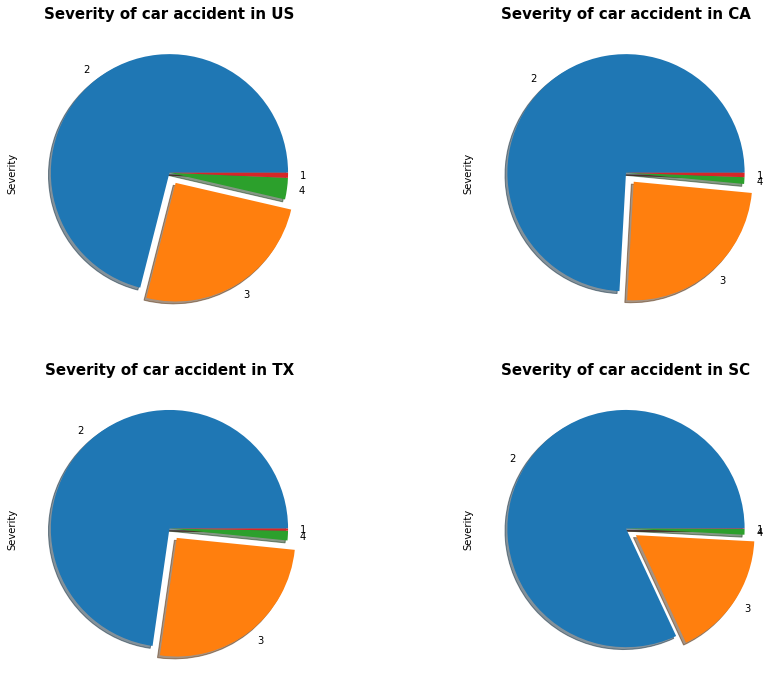

In [10]:
df_CA = df[df['State'] == 'CA']
df_TX = df[df['State'] == 'TX']
df_SC = df[df['State'] == 'SC']

plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
Severity_US = df["Severity"].value_counts()
Severity_US.plot(kind='pie', explode = [0,0.1,0,0], shadow= True)
plt.title('Severity of car accident in US', weight = 'bold', size = 15)

plt.subplot(2,2,2)
Severity_CA = df_CA["Severity"].value_counts()
Severity_CA.plot(kind='pie', explode = [0,0.1,0,0], shadow= True)
plt.title('Severity of car accident in CA', weight = 'bold', size = 15)

plt.subplot(2,2,3)
Severity_TX = df_TX["Severity"].value_counts()
Severity_TX.plot(kind='pie', explode = [0,0.1,0,0], shadow= True)
plt.title('Severity of car accident in TX', weight = 'bold', size = 15)

plt.subplot(2,2,4)
Severity_SC = df_SC["Severity"].value_counts()
Severity_SC.plot(kind='pie', explode = [0,0.1,0,0], shadow= True)
plt.title('Severity of car accident in SC', weight = 'bold', size =15)


### we see that althought South Carolina is one of the states with high rate of car accident, it has fewer accidents with with severity of 3 than US and two other states. Also, The severity level 4 for all three states are lower than that of US.